Mở một file trên cơ sở dữ liệu UCI và khảo sát file dữ liệu này.
1) mở file, ví dụ file:
https://archive.ics.uci.edu/ml/datasets/Diabetes
- liệt kê một số dòng dữ liệu ban đầu
2) tìm hiểu thông tin về data này:
- tên các attributes
- kiểu dữ liệu 
- số lượng cột (attribute)
- số lượng dòng (instance)
3) lọc dữ liệu theo tiêu chuẩn:
- lấy tất cả các cột dữ liệu có kiểu số (ko phải kiểu categorial)
- lấy các dòng dữ liệu từ dòng thứ m tới dòng thứ n 
- lọc các dòng dữ liệu và các cột dữ liệu theo tiêu chí tự đặt ra 
4) tìm hiểu xem có giá trị dữ liệu nào bị NAN (null) hay không:
- bỏ tất cả các cột có giá trị NAN
- bỏ tất cả các dòng có giá trị NAN
5) Vẽ đồ thị:
- một số cột dữ liệu theo tần suất của các giá trị của cột đó (đồ thị dạng bar)
- một số cặp attribute theo dạng đồ thị scatter 
6) Đổi các giá trị dạng categorical/nomial sang dạng số (numerical)
- sử dụng pandas.Factorize
- sử dụng LabelEncoder
- sử pandas.dummies

In [67]:
# Tran Cong Dat - 51800183
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('flag.data')

In [42]:
print(df.head()) # print 5 (default) data at first

      Afghanistan  5  1   648  16  10  2  0  3  5.1  ...  0.5  0.6  1.6  0.7  \
0         Albania  3  1    29   3   6  6  0  0    3  ...    0    0    1    0   
1         Algeria  4  1  2388  20   8  2  2  0    3  ...    0    0    1    1   
2  American-Samoa  6  3     0   0   1  1  0  0    5  ...    0    0    0    0   
3         Andorra  3  1     0   0   6  0  3  0    3  ...    0    0    0    0   
4          Angola  4  2  1247   7  10  5  0  2    3  ...    0    0    1    0   

   0.8  1.7  0.9 0.10  black  green.1  
0    0    0    1    0    red      red  
1    0    0    0    0  green    white  
2    1    1    1    0   blue      red  
3    0    0    0    0   blue      red  
4    0    1    0    0    red    black  

[5 rows x 30 columns]


In [44]:
print(df.tail(3)) # last data

    Afghanistan  5  1  648  16  10  2  0  3  5.1  ...  0.5  0.6  1.6  0.7  \
190       Zaire  4  2  905  28  10  5  0  0    4  ...    0    0    0    0   
191      Zambia  4  2  753   6  10  5  3  0    4  ...    0    0    0    0   
192    Zimbabwe  4  2  391   8  10  5  0  7    5  ...    0    0    1    0   

     0.8  1.7  0.9 0.10  black  green.1  
190    0    1    1    0  green    green  
191    0    0    1    0  green    brown  
192    1    1    1    0  green    green  

[3 rows x 30 columns]


In [45]:
for index, row in df.iterrows(): # read each row
    print(index, row)

0 Afghanistan    Albania
5                    3
1                    1
648                 29
16                   3
10                   6
2                    6
0                    0
3                    0
5.1                  3
1.1                  1
1.2                  0
0.1                  0
1.3                  1
1.4                  0
1.5                  1
0.2                  0
green              red
0.3                  0
0.4                  0
0.5                  0
0.6                  0
1.6                  1
0.7                  0
0.8                  0
1.7                  0
0.9                  1
0.10                 0
black              red
green.1            red
Name: 0, dtype: object
1 Afghanistan    Algeria
5                    4
1                    1
648               2388
16                  20
10                   8
2                    2
0                    2
3                    0
5.1                  3
1.1                  1
1.2                  1
0.1    

Name: 180, dtype: object
181 Afghanistan    US-Virgin-Isles
5                            1
1                            4
648                          0
16                           0
10                           1
2                            1
0                            0
3                            0
5.1                          6
1.1                          1
1.2                          1
0.1                          1
1.3                          1
1.4                          1
1.5                          0
0.2                          0
green                    white
0.3                          0
0.4                          0
0.5                          0
0.6                          0
1.6                          0
0.7                          0
0.8                          0
1.7                          1
0.9                          1
0.10                         1
black                    white
green.1                  white
Name: 181, dtype: object
182 Afghanistan 

In [46]:
print(df.columns)

Index(['Afghanistan', '5', '1', '648', '16', '10', '2', '0', '3', '5.1', '1.1',
       '1.2', '0.1', '1.3', '1.4', '1.5', '0.2', 'green', '0.3', '0.4', '0.5',
       '0.6', '1.6', '0.7', '0.8', '1.7', '0.9', '0.10', 'black', 'green.1'],
      dtype='object')


In [21]:
print(df.describe())

                5           1           648           16          10  \
count  193.000000  193.000000    193.000000   193.000000  193.000000   
mean     3.564767    2.217617    700.316062    23.305699    5.316062   
std      1.553625    1.308745   2176.570790    92.171685    3.489359   
min      1.000000    1.000000      0.000000     0.000000    1.000000   
25%      3.000000    1.000000      9.000000     0.000000    2.000000   
50%      4.000000    2.000000    111.000000     4.000000    6.000000   
75%      5.000000    4.000000    463.000000    14.000000    9.000000   
max      6.000000    4.000000  22402.000000  1008.000000   10.000000   

                2           0           3         5.1         1.1  ...  \
count  193.000000  193.000000  193.000000  193.000000  193.000000  ...   
mean     2.191710    0.455959    1.544041    3.455959    0.787565  ...   
std      2.066482    1.040522    2.331706    1.298789    0.410095  ...   
min      0.000000    0.000000    0.000000    1.000000  

In [47]:
df.select_dtypes(exclude='category') # rows without category, include is opposite

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Western-Samoa,6,3,3,0,1,1,0,0,3,...,0,1,5,0,0,0,0,0,blue,red
189,Yugoslavia,3,1,256,22,6,6,0,3,4,...,0,0,1,0,0,0,0,0,blue,red
190,Zaire,4,2,905,28,10,5,0,0,4,...,0,0,0,0,0,1,1,0,green,green
191,Zambia,4,2,753,6,10,5,3,0,4,...,0,0,0,0,0,0,1,0,green,brown


In [48]:
print(df.iloc[1:4]) # get data according to conditional

      Afghanistan  5  1   648  16  10  2  0  3  5.1  ...  0.5  0.6  1.6  0.7  \
1         Algeria  4  1  2388  20   8  2  2  0    3  ...    0    0    1    1   
2  American-Samoa  6  3     0   0   1  1  0  0    5  ...    0    0    0    0   
3         Andorra  3  1     0   0   6  0  3  0    3  ...    0    0    0    0   

   0.8  1.7  0.9 0.10  black  green.1  
1    0    0    0    0  green    white  
2    1    1    1    0   blue      red  
3    0    0    0    0   blue      red  

[3 rows x 30 columns]


In [52]:
#convert data to numpy 
data = df.values
print(data.shape)

(193, 30)


In [11]:
print(df.isnull()) # notnull is opposite

       27   Private   198286   Some-college     10   Never-married  \
0   False     False    False          False  False           False   
1   False     False    False          False  False           False   
2   False     False    False          False  False           False   
3   False     False    False          False  False           False   
4   False     False    False          False  False           False   
5   False     False    False          False  False           False   
6   False     False    False          False  False           False   
7   False     False    False          False  False           False   
8   False     False    False          False  False           False   
9   False     False    False          False  False           False   
10  False     False    False          False  False           False   
11  False     False    False          False  False           False   
12  False     False    False          False  False           False   
13  False     False 

In [49]:
df.dropna(inplace = False) # not change original data
print(df.to_string())

                  Afghanistan  5  1    648    16  10  2  0   3  5.1  1.1  1.2  0.1  1.3  1.4  1.5  0.2   green  0.3  0.4  0.5  0.6  1.6  0.7  0.8  1.7  0.9  0.10   black green.1
0                     Albania  3  1     29     3   6  6  0   0    3    1    0    0    1    0    1    0     red    0    0    0    0    1    0    0    0    1     0     red     red
1                     Algeria  4  1   2388    20   8  2  2   0    3    1    1    0    0    1    0    0   green    0    0    0    0    1    1    0    0    0     0   green   white
2              American-Samoa  6  3      0     0   1  1  0   0    5    1    0    1    1    1    0    1    blue    0    0    0    0    0    0    1    1    1     0    blue     red
3                     Andorra  3  1      0     0   6  0  3   0    3    1    0    1    1    0    0    0    gold    0    0    0    0    0    0    0    0    0     0    blue     red
4                      Angola  4  2   1247     7  10  5  0   2    3    1    0    0    1    0    1    0     red

In [53]:
df.empty # check data null or not ?

False

In [54]:
df.isnull().any() # check is any data null ?

Afghanistan    False
5              False
1              False
648            False
16             False
10             False
2              False
0              False
3              False
5.1            False
1.1            False
1.2            False
0.1            False
1.3            False
1.4            False
1.5            False
0.2            False
green          False
0.3            False
0.4            False
0.5            False
0.6            False
1.6            False
0.7            False
0.8            False
1.7            False
0.9            False
0.10           False
black          False
green.1        False
dtype: bool

In [84]:
df = df.dropna() # delete NaN data

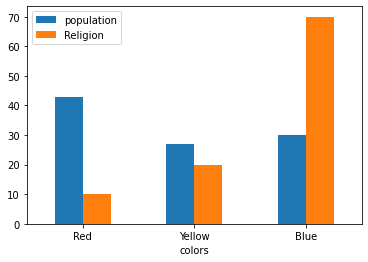

In [66]:
# trục hoành là 1 cột, trục tung là các cột giá trị số còn lại  
df1 = pd.DataFrame({'colors': ['Red', 'Yellow', 'Blue'],
                  'Countries': ['Afghanistan','Algeria','Albania'],
                   'population': [43, 27, 30],
                   'Religion':[10,20,70]},
                  index=['Countries', 'Populatio', 'Blue'])
#print(df1)
df1.plot.bar(x='colors', rot=0)

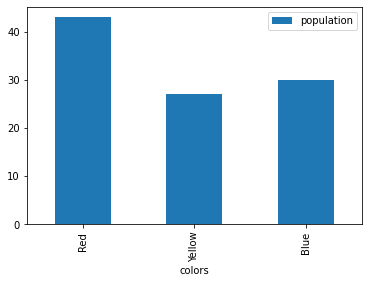

In [68]:
df1 = pd.DataFrame({'colors': ['Red', 'Yellow', 'Blue'],
                  'Countries': ['Afghanistan','Algeria','Albania'],
                   'population': [43, 27, 30],
                   'Religion':[10,20,70]},
                  index=['Countries', 'Populatio', 'Blue'])
#print(df1)
df1.plot.bar(x='colors', y='population')

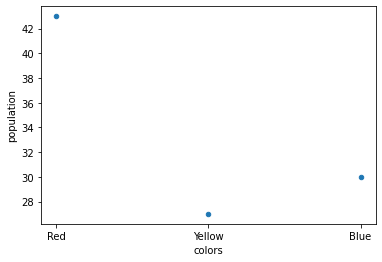

In [69]:
df1.plot.scatter(x='colors',y='population')

In [78]:
from sklearn.preprocessing import LabelEncoder

df2 = pd.DataFrame({ 'Countries': ['Afghanistan','Algeria','Albania'],
                   'Code Country':[112,214,324]})
                    
LE = LabelEncoder()
df2['code'] = LE.fit_transform(df2['Code Country'])
print(df2)

     Countries  Code Country  code
0  Afghanistan           112     0
1      Algeria           214     1
2      Albania           324     2


In [81]:
a = pd.factorize(df2['Code Country']) 
print(a)
print(list(a[0]))
print(df2)

(array([0, 1, 2], dtype=int64), Int64Index([112, 214, 324], dtype='int64'))
[0, 1, 2]
     Countries  Code Country  code
0  Afghanistan           112     0
1      Algeria           214     1
2      Albania           324     2


In [83]:
a = pd.get_dummies(df2['Code Country'])
print(a)
frames = [df2,a]
result = pd.concat(frames,axis=1)
print(result)

   112  214  324
0    1    0    0
1    0    1    0
2    0    0    1
     Countries  Code Country  code  112  214  324
0  Afghanistan           112     0    1    0    0
1      Algeria           214     1    0    1    0
2      Albania           324     2    0    0    1
